In [61]:
import numpy as np
from scipy.stats import skew, skewtest
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
total = pd.concat([train, test], axis=0)
print("Train shape is:", train.shape)
print("Test shape is:", test.shape)
print("Total shape is:", total.shape)

Train shape is: (1460, 81)
Test shape is: (1459, 80)
Total shape is: (2919, 81)


# Encode Ordinal Variable

In [6]:
total = total.replace({"Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageFinish" : {"None" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})

# Variable Transformation

### Float variables

In [7]:
total.select_dtypes(include=["float64"]).shape

(2919, 25)

In [63]:
total.select_dtypes(include=["float64"]).max()

1stFlrSF            8.536211
2ndFlrSF            7.633370
3SsnPorch           6.232448
Alley               2.000000
BsmtCond            4.000000
BsmtFinSF1          8.638525
BsmtFinSF2          7.331060
BsmtFinType1        6.000000
BsmtFinType2        6.000000
BsmtFullBath        3.000000
BsmtHalfBath        2.000000
BsmtQual            5.000000
BsmtUnfSF          48.332184
EnclosedPorch       6.920672
ExterCond           1.791759
ExterQual           1.791759
FireplaceQu         5.000000
Functional          8.000000
GarageArea       1488.000000
GarageCars          5.000000
GarageCond          5.000000
GarageFinish        3.000000
GarageQual          5.000000
GarageYrBlt      2010.000000
GrLivArea           8.638171
KitchenAbvGr        1.386294
KitchenQual         5.000000
LotArea            12.279537
LotFrontage       313.000000
LowQualFinSF        6.970730
MSSubClass          5.252273
MasVnrArea          7.378384
MiscVal             9.741027
OpenPorchSF         6.610696
PoolArea      

In [9]:
total['GarageYrBlt'][total['GarageYrBlt'] > 2010] = np.nan

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000267F13B7C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000267F1E886A0>]], dtype=object)

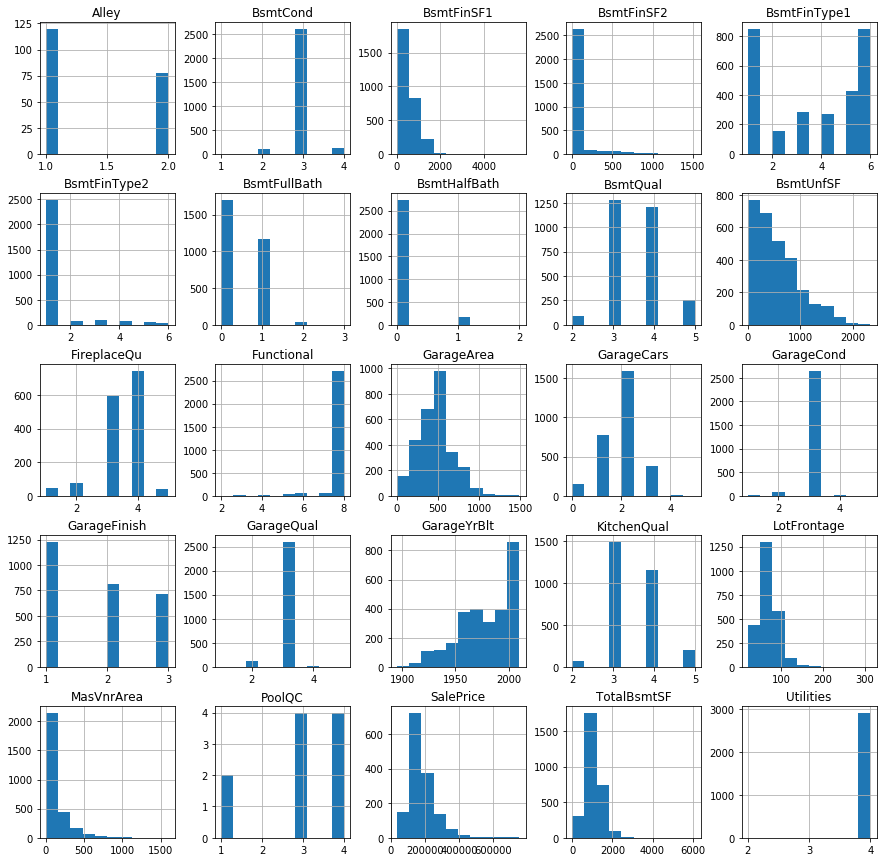

In [10]:
total.select_dtypes(include="float64").hist(figsize=(15,15))

In [11]:
# sqrt root transformation
total['BsmtUnfSF'] = total['BsmtUnfSF'].apply(np.sqrt)

In [12]:
# log1p transformation
total[['BsmtFinSF1', 'BsmtFinSF2', "MasVnrArea", "SalePrice"]] = total[['BsmtFinSF1', 'BsmtFinSF2', "MasVnrArea", "SalePrice"]].apply(np.log1p)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000267F1EDB940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000267F3B835F8>]], dtype=object)

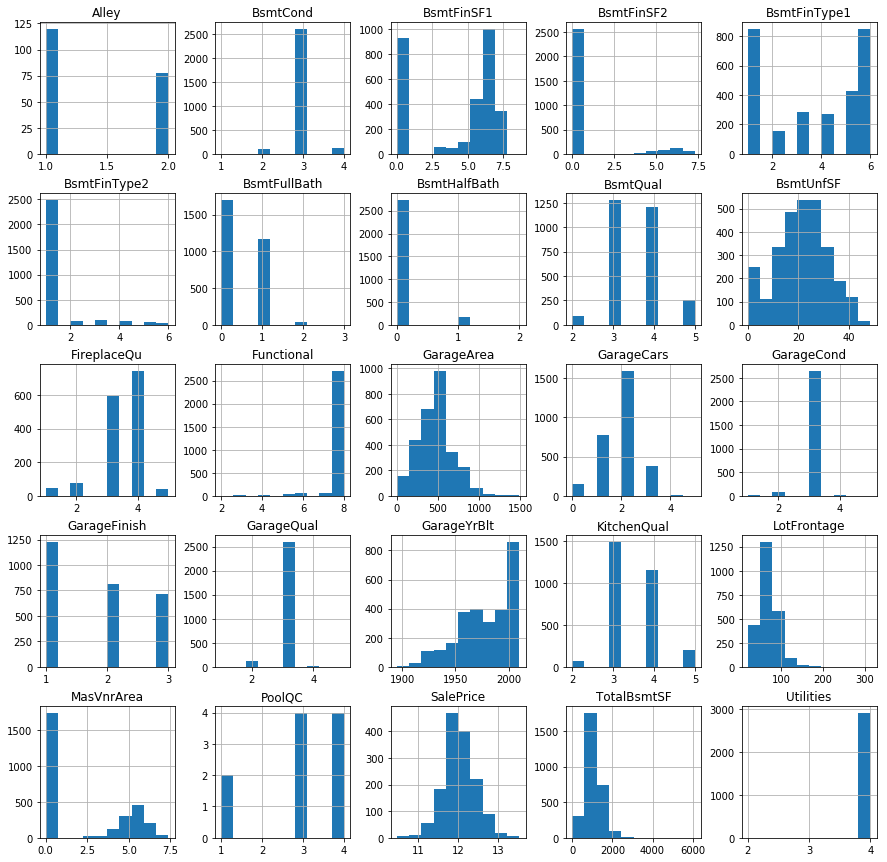

In [13]:
total.select_dtypes(include="float64").hist(figsize=(15,15))

### Int variables

In [14]:
total.select_dtypes(include=["int64"]).shape

(2919, 33)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000267F43A2D30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000267F4A8A828>]], dtype=object)

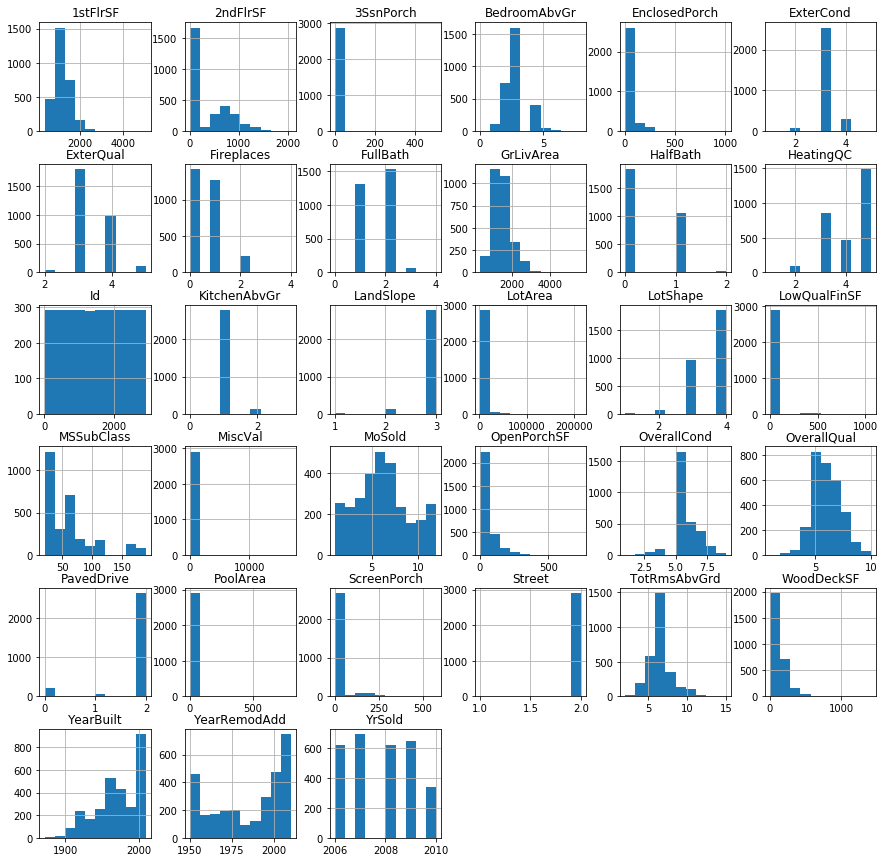

In [15]:
total.select_dtypes(include="int64").hist(figsize=(15,15))

In [16]:
intFeature = total.select_dtypes(include="int64").apply(lambda x: skew(x.astype(float).dropna()))
skewIntFeat = intFeature[intFeature > .75].index.tolist()
total[skewIntFeat] = total[skewIntFeat].apply(np.log1p)

# LightGBM

In [17]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

In [18]:
catCol = total.select_dtypes("object").columns.tolist()

In [19]:
total.select_dtypes("object").dtypes

BldgType         object
BsmtExposure     object
CentralAir       object
Condition1       object
Condition2       object
Electrical       object
Exterior1st      object
Exterior2nd      object
Fence            object
Foundation       object
GarageType       object
Heating          object
HouseStyle       object
LandContour      object
LotConfig        object
MSZoning         object
MasVnrType       object
MiscFeature      object
Neighborhood     object
RoofMatl         object
RoofStyle        object
SaleCondition    object
SaleType         object
dtype: object

In [20]:
LabelMap = dict()
for i in catCol:
    print('Start encoding ' + i)
    total[i] = total[i].fillna('missing')
    le = LabelEncoder()
    le.fit(total[i].astype(str))
    LabelMap[i] = dict(zip(le.classes_, le.transform(le.classes_)))

Start encoding BldgType
Start encoding BsmtExposure
Start encoding CentralAir
Start encoding Condition1
Start encoding Condition2
Start encoding Electrical
Start encoding Exterior1st
Start encoding Exterior2nd
Start encoding Fence
Start encoding Foundation
Start encoding GarageType
Start encoding Heating
Start encoding HouseStyle
Start encoding LandContour
Start encoding LotConfig
Start encoding MSZoning
Start encoding MasVnrType
Start encoding MiscFeature
Start encoding Neighborhood
Start encoding RoofMatl
Start encoding RoofStyle
Start encoding SaleCondition
Start encoding SaleType


In [21]:
total.replace(LabelMap, inplace=True)

In [22]:
# drop ID columns
total.drop("Id", axis=1, inplace=True)

In [23]:
dtrain = total[:train.shape[0]]
X_train = dtrain.drop("SalePrice", axis=1)
y_train = dtrain['SalePrice']
dtest = total[train.shape[0]:]
X_test = dtest.drop("SalePrice", axis=1)
y_test = dtest['SalePrice']

## Grid Search Parameter Tuning on 5-fold CV

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'mse'},
    'num_boost_round': 100,
    'learning_rate': .1,
    'num_leaves': 31,
    'max_bin': 255,
    'lambda_l2': .05,
    'num_threads':8
}

param_grid = {
    'boosting_type': ['gbdt'],
    'objective': ['regression', 'regression_l2', 'huber'],
    'metric': ['mse'],
    'num_boost_round': [100],
    'learning_rate': [.1],
    'num_leaves': [20,30,50,90],
    'max_bin': [255,383,511],
    'lambda_l2': [0, .05, .1],
    'num_threads': [8],
}


mod = lgb.LGBMRegressor(boosting_type=params['boosting_type'],
                         objective=params['objective'],
                         metric=params['metric'],
                         num_boost_round=params['num_boost_round'],
                         learning_rate=params['learning_rate'],
                         num_leaves=params['num_leaves'],
                         max_bin=params['max_bin'],
                         lambda_l2=params['lambda_l2'],
                         num_threads=params['num_threads']
                         )

In [26]:
%%time
print('CV training start...')
grid = GridSearchCV(mod, param_grid, cv=5)
grid.fit(X_train, y_train)

CV training start...


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it in

Wall time: 2min 19s


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:98: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [27]:
print('Best parameters found by grid search are:', grid.best_params_)

Best parameters found by grid search are: {'boosting_type': 'gbdt', 'lambda_l2': 0, 'learning_rate': 0.1, 'max_bin': 255, 'metric': 'mse', 'num_boost_round': 100, 'num_leaves': 20, 'num_threads': 8, 'objective': 'regression'}


In [66]:
%%time
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'mse'},
    'num_leaves': 20,
    'max_bin': 255,
    'learning_rate': 0.05,
    'verbose': 0,
    'num_threads':8
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                categorical_feature = catCol,
                num_boost_round=10000)

print('Save model...')
# save model to file
gbm.save_model('lgb_model.txt')

Start training...
Save model...
Wall time: 13.3 s


# Variable Importance

In [71]:
import seaborn as sns

In [72]:
df_imp = pd.DataFrame({'feature':gbm.feature_name(), 'importance':gbm.feature_importance()}).sort_values("importance", ascending=False)

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


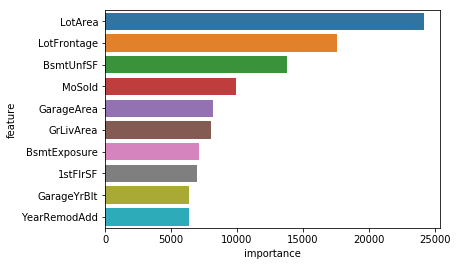

In [75]:
sns.barplot(y='feature', x='importance', data=df_imp[:10])

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


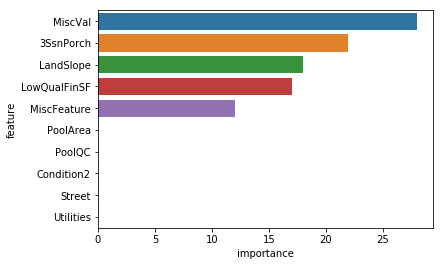

In [59]:
sns.barplot(y='feature', x='importance', data=df_imp[-10:])

# Create Submission CSV

In [76]:
subcsv = pd.DataFrame({'Id': test['Id'], 'SalePrice': np.expm1(gbm.predict(X_test))})

In [77]:
subcsv.head()

,Id,SalePrice
0,1461,121644.681550
1,1462,154462.807836
2,1463,191082.773715
3,1464,193168.287957
4,1465,188242.907708


In [78]:
subcsv.to_csv("prediction1.csv", index=False)